In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from pathlib import Path
import ast
from IPython.display import display
import numpy as np
import seaborn as sns

override_files = (list(Path('.').glob('**/overrides.yaml')))
df = pd.DataFrame()
for override_file in override_files:    
       
    factors = yaml.safe_load(override_file.read_text())
    factors = dict([elm.split('=') for elm in factors if elm[0] != '+'])
    
    factors = pd.DataFrame(factors,index=range(0,int(factors['epochs']))) #Factors df with a duplicate row per epoch
    factors['epoch'] = list(range(1,int(factors.epochs[0]) + 1 )) #Adding epoch number to each row
    
    log_file =  override_file.parent.parent /'TrainModel.log'
    with open(log_file) as f:
        metrics = [log.split("- ")[-1].strip().split(': ') for log in f.readlines()]
        metrics = pd.DataFrame({k:ast.literal_eval(v) for k,v in metrics}) #Metric df containing the log metrics
    
    #concat factor and metrics dfs to the final df
    df = pd.concat([df, pd.concat([factors, metrics],axis=1)])
    

In [2]:
df = df.rename(columns={'modelconf.layersconf.Dropout.rate':'DropoutRate'})
df.DropoutRate = df.DropoutRate.astype('float64')
df.epoch = df.epoch.astype('uint8')

In [7]:
desc = df[df.epoch > 20].groupby(['DropoutRate']).describe()
val_acc = desc['Validation Accuracy'].reset_index().sort_values('50%', ascending=False)
train_acc = desc['Train Accuracy'].reset_index().sort_values('50%', ascending=False)

In [8]:
val_acc[val_acc['50%'] > 0.65]

,DropoutRate,count,mean,std,min,25%,50%,75%,max
2,0.45,90.0,0.776222,0.056587,0.540883,0.755970,0.794139,0.805535,0.874457
5,0.60,90.0,0.784407,0.030732,0.666064,0.768632,0.790702,0.803546,0.846237
4,0.55,90.0,0.774944,0.044894,0.586831,0.756060,0.781657,0.804269,0.862880
1,0.40,90.0,0.772146,0.043291,0.635311,0.752261,0.771165,0.800380,0.863242
3,0.50,90.0,0.764745,0.035432,0.645803,0.741588,0.768090,0.790069,0.846961
7,0.70,90.0,0.761224,0.039097,0.629522,0.746382,0.766281,0.788893,0.826700
6,0.65,90.0,0.756573,0.047610,0.630246,0.729830,0.765376,0.784732,0.848770
0,0.00,90.0,0.735593,0.048133,0.598770,0.707399,0.740232,0.771075,0.844790


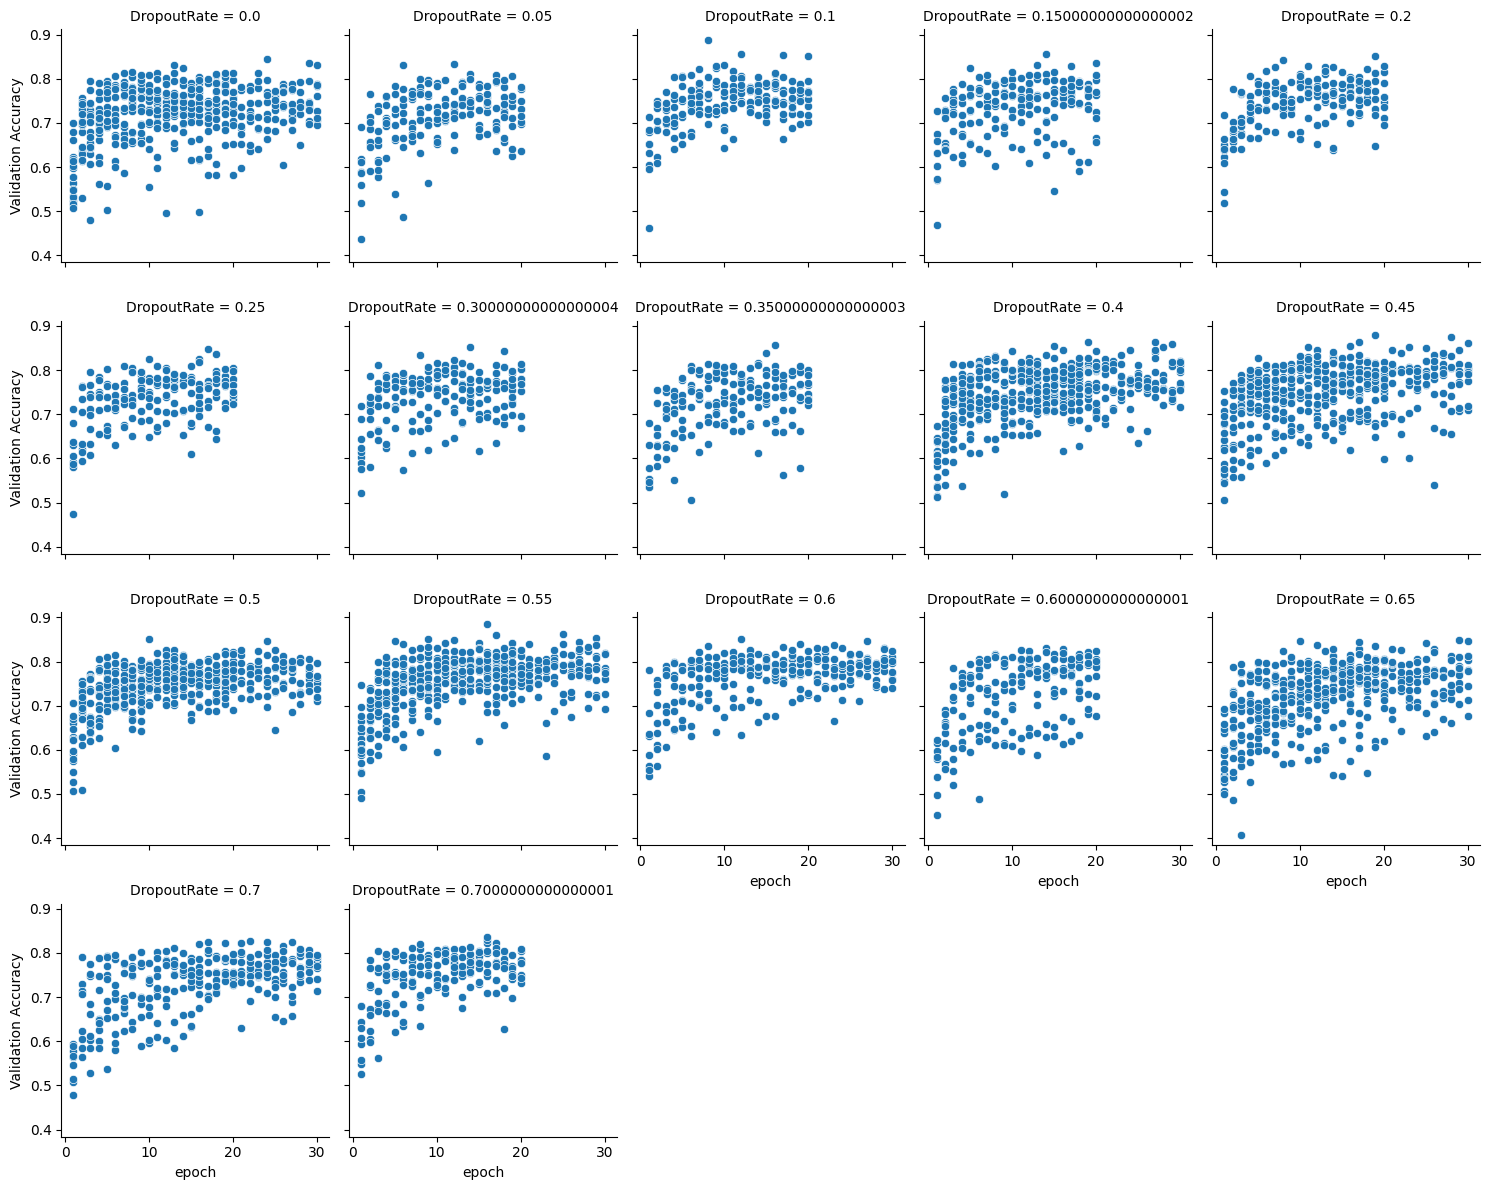

In [5]:
g = sns.FacetGrid(df, col = 'DropoutRate', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Validation Accuracy')
plt.tight_layout()

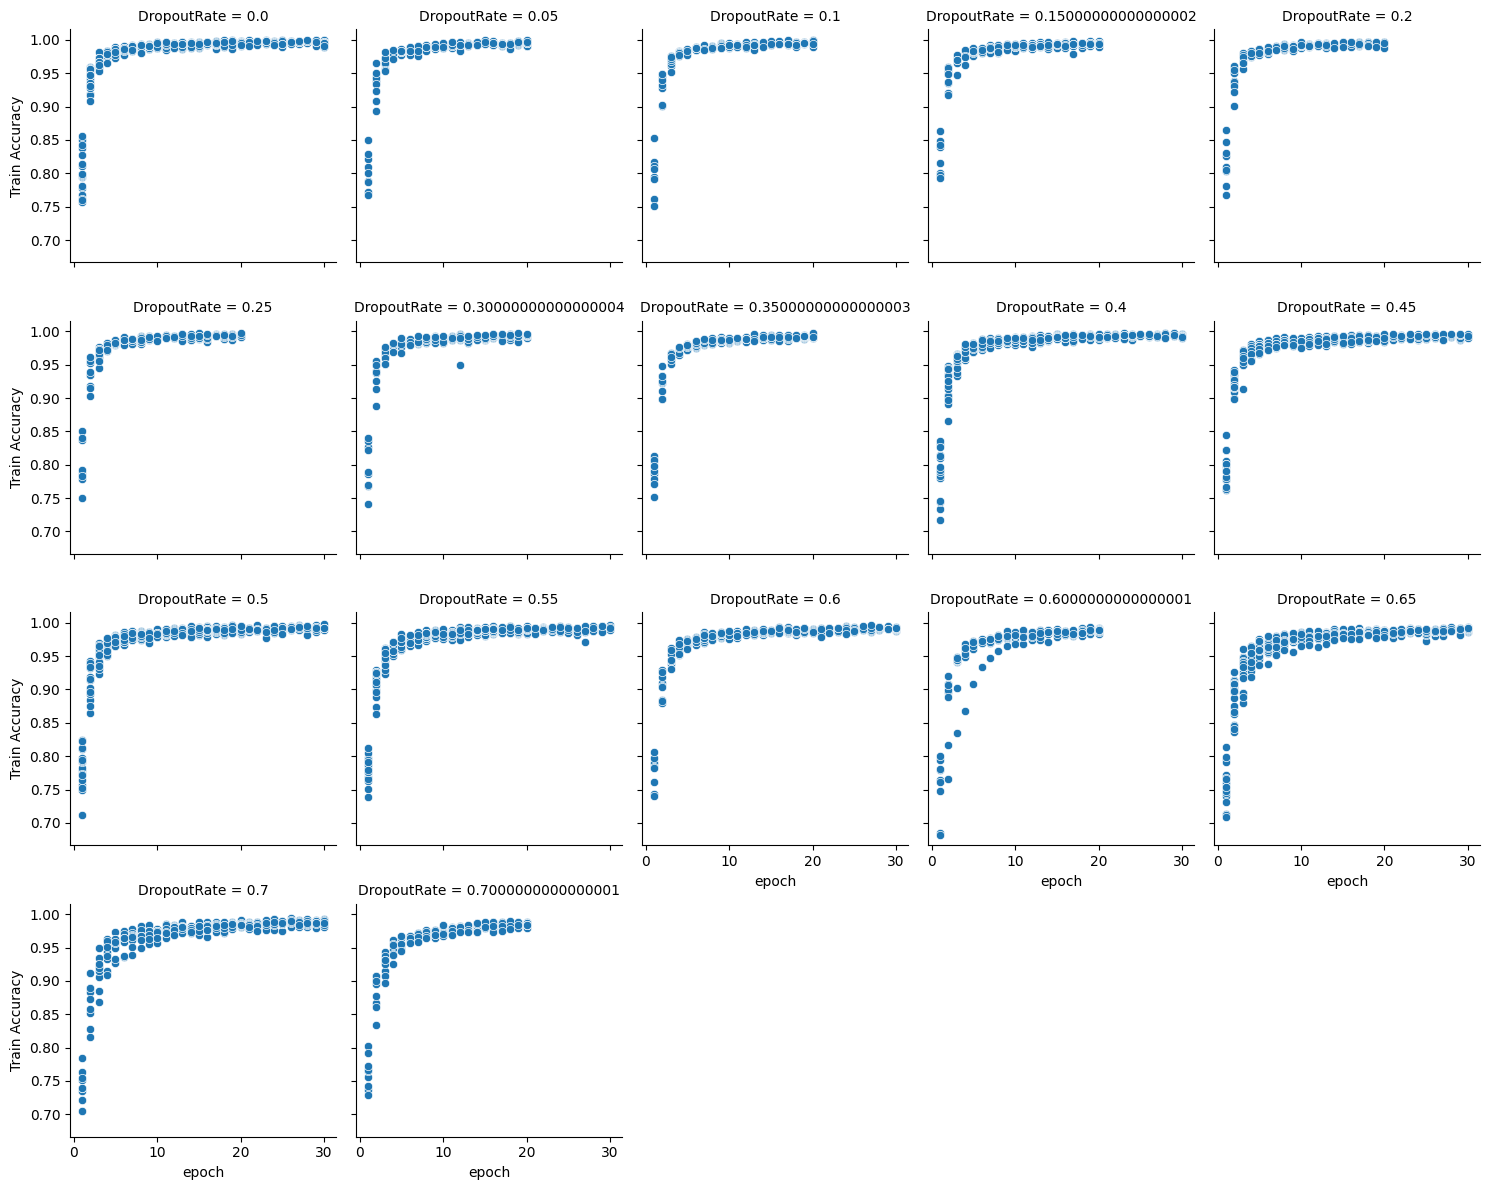

In [6]:
g = sns.FacetGrid(df, col = 'DropoutRate', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='epoch', y='Train Accuracy')
plt.tight_layout()